In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import numpy as np
from models import *

import torch
import torch.optim

from skimage.measure import compare_psnr
from utils.denoising_utils import *

from blitz.losses import kl_divergence_from_nn



torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

imsize =-1
PLOT = True

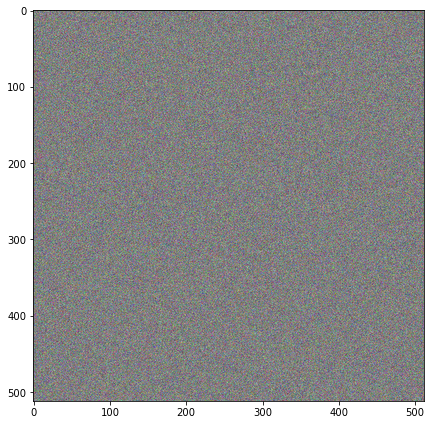

In [2]:
# get Gaussian noise
fname = 'data/denoising/F16_GT.png'
noise_level = 0.1

img_pil = crop_image(get_image(fname, imsize)[0], d=32)
img_np = pil_to_np(img_pil)

blank_img = img_np * 0 + 0.5

_, gaussian_noise = get_noisy_image(blank_img, noise_level)

plot_image_grid([gaussian_noise], 4, 6);


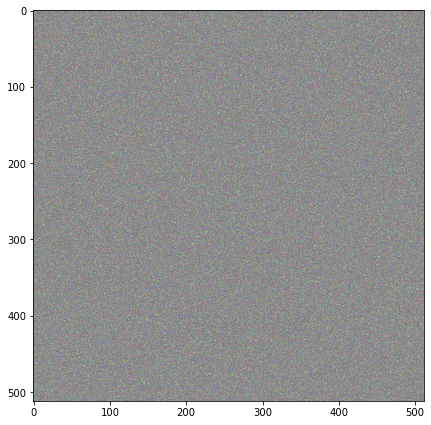

In [3]:
# get Poisson noise
filename = 'myimage.png'
PEAK = 10
noise_mask = np.random.poisson(blank_img) / PEAK

poisson_noise = np.clip(blank_img + noise_mask, 0, 1).astype(np.float32)

plot_image_grid([poisson_noise], 4, 6);


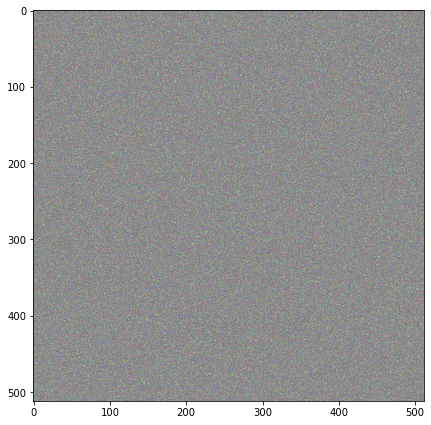

In [4]:
# get Uniform noise
level = 0.15
noise_mask = np.random.uniform(-level, level, size=blank_img.shape)
uniform_noise = np.clip(blank_img + noise_mask, 0, 1).astype(np.float32)
plot_image_grid([poisson_noise], 4, 6);

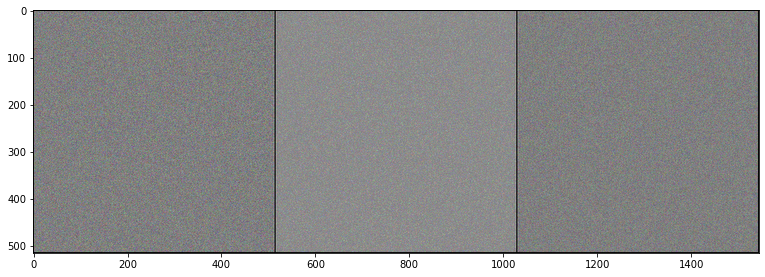

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.66467154, ..., 0.50321853,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.38401896, ..., 0.5501973 ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.6083095 , ..., 0.4170761 ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.5166687 , ..., 0.56284535,
         0.        , 0.        ],
        [0. 

In [5]:
plot_image_grid([gaussian_noise, poisson_noise, uniform_noise], 4, 10)

In [7]:
save_image_grid([gaussian_noise, poisson_noise, uniform_noise], "Noises.jpg", 4, 10)


<Figure size 936x1584 with 0 Axes>

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.66467154, ..., 0.50321853,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.38401896, ..., 0.5501973 ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.6083095 , ..., 0.4170761 ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.5166687 , ..., 0.56284535,
         0.        , 0.        ],
        [0. 